In [107]:
import h5py as h5;
import numpy as np;
from scipy import optimize;
import matplotlib.pyplot as plt;

In [108]:
def SineWave(t, T, Phi=0, A=1, offset=0):
    phi = np.arctan(np.tan(Phi));
    return A*np.sin(2*np.pi*t/T+Phi)+offset;

def CosineWave(t, T, Phi=0, A=1, offset=0):
    phi = np.arctan(np.tan(Phi));
    return A*2*np.pi/T*np.sin(2*np.pi*t/T+Phi);

def GetPhaseDiff( a, b):
    return np.arctan2( np.sin(a-b), np.cos(a-b));

In [188]:
ch_index = 0
nb_slice = 4000

DY = []
DDY = []

file_prefix = '/sdata/data_challenge1/data_challenge_1a/Data_Challenge_1a_I1_D20200602_T155523_F0'
file_prefix = '/sdata/data_challenge1/data_challenge_1b/Data_Challenge_1b_I1_D20200601_T161750_F00'
file_prefix = '/sdata/data_challenge1/data_challenge_1b_contrast/Data_Challenge_1b_Finite_I1_D20200607_T163827_F00'

for index in range(1,11):
    
    dump_num = '%02d' % index
    filename = file_prefix + dump_num + '.hdf5'
    file = h5.File( filename )

    #print('Keys:')
    #print( list( file.attrs.keys() ) )
    #print('Keys under adc1:')
    #print( list( file['adc1'].attrs.keys() ) )

    nb_samples = file['adc1'].attrs['nb_samples']
    nb_events = file['adc1'].attrs['nb_events']
    sample_rate = file['adc1'].attrs['sample_rate']

    cal = file['adc1'].attrs['adc_conversion_factor']
    cal_coeff = cal[ch_index][::-1]
    poly = np.poly1d( cal_coeff )


    for evt_index in range(1, nb_events):

        bounds = ([0.1, -np.pi, -2, -0.5], [2, np.pi, 2, 0.5 ]);

        #t1 = 1000*np.linspace( 0, nb_samples/sample_rate, nb_samples)[-nb_slice:]
        y1 = poly(file['adc1']['event_%d' % evt_index][ch_index][-1])
        #par1, opt = optimize.curve_fit(SineWave, t1, y1)

        #t2 = 1000*np.linspace( nb_samples/sample_rate, 2*nb_samples/sample_rate, nb_samples)[:nb_slice]
        y2 = poly(file['adc1']['event_%d' % (evt_index+1)][ch_index][0])
        #par2, opt = optimize.curve_fit(SineWave, t2, y2)

        #t = np.append(t1,t2);

        #dy = (SineWave(t2, *par2)[0]-SineWave(t1, *par1)[-1])/par1[0]
        #ddy = (CosineWave(t2, *par2)[0]-CosineWave(t1, *par1)[-1])
        
        DY = np.append( DY, y2-y1)
        #DDY = np.append( DDY, ddy)
    
    file.close()

Text(0.5, 1.0, 'Data Challenge 1b D20200601 T161750')

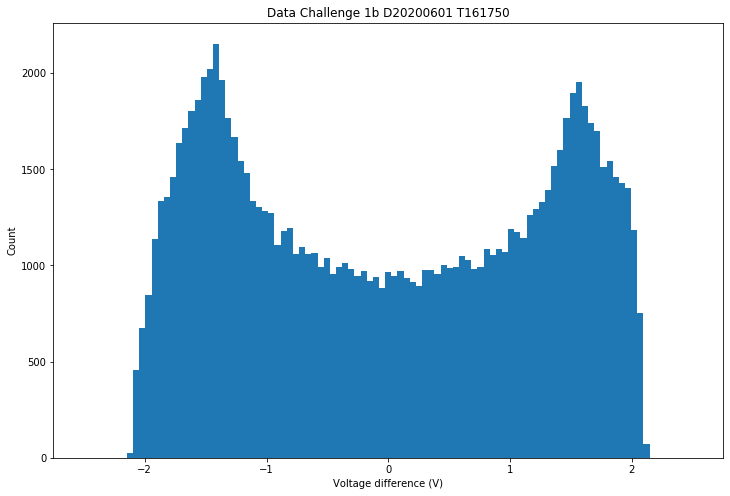

In [192]:
plt.figure( figsize=(12,8) );
plt.hist(DY, bins=np.linspace(-2.5, 2.5, 100));
plt.xlabel("Voltage difference (V)");
plt.ylabel("Count");
plt.title('Data Challenge 1b D20200601 T161750')


[0.00074983]


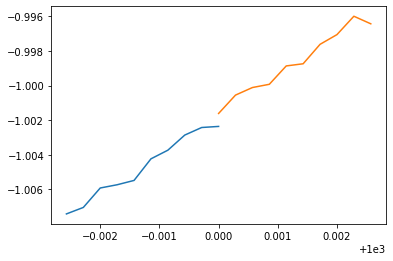

In [186]:
nb_slice = 10

file_prefix = '/sdata/data_challenge1/data_challenge_1b/Data_Challenge_1b_I1_D20200601_T161750_F00'
file_prefix = '/sdata/data_challenge1/data_challenge_1a/Data_Challenge_1a_I1_D20200602_T155523_F0'

index = 2

dump_num = '%03d' % index
filename = file_prefix + dump_num + '.hdf5'
file = h5.File( filename )

nb_samples = file['adc1'].attrs['nb_samples']
nb_events = file['adc1'].attrs['nb_events']
sample_rate = file['adc1'].attrs['sample_rate']

cal = file['adc1'].attrs['adc_conversion_factor']
cal_coeff = cal[ch_index][::-1]
poly = np.poly1d( cal_coeff )


evt_index = 10

t1 = 1000*np.linspace( 0, nb_samples/sample_rate, nb_samples)[-nb_slice:]
y1 = poly(file['adc1']['event_%d' % evt_index][ch_index][-nb_slice:])
        #par1, opt = optimize.curve_fit(SineWave, t1, y1)

t2 = 1000*np.linspace( nb_samples/sample_rate, 2*nb_samples/sample_rate, nb_samples)[:nb_slice]
y2 = poly(file['adc1']['event_%d' % (evt_index+1)][ch_index][:nb_slice])
        #par2, opt = optimize.curve_fit(SineWave, t2, y2)

t = np.append(t1,t2);

plt.plot(t1, y1)
plt.plot(t2, y2)
print(y2[0]-y1[-1:])

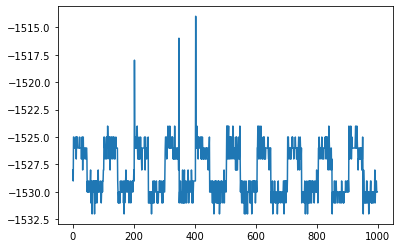

In [126]:
chan_index = 2

event_name = 'event_%d' % evt_index
event = f[event_name][chan_index][0:1000]
plt.plot(event)

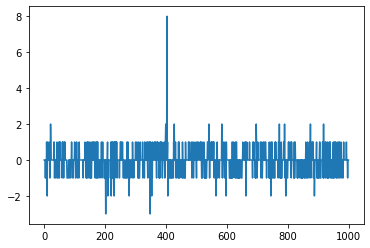

In [127]:
chan_index = 3

event_name = 'event_%d' % evt_index
event = f[event_name][chan_index][0:1000]
plt.plot(event)

In [103]:
for dump_index in range(1,133):
    print(dump_index)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
